In [1]:
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq

import matplotlib.pyplot as plt
fs = pa.hdfs.connect()

<ipython-input-1-4e3989ce2779>:6: DeprecationWarning: pyarrow.hdfs.connect is deprecated as of 2.0.0, please use pyarrow.fs.HadoopFileSystem instead.
  fs = pa.hdfs.connect()


In [2]:
with fs.open("/data/Archive/bhavesh/InventoryPrediction/temp/topQueries/WomenKurtas/top20/part-00000-4d9000ce-b970-403d-995e-3196afc3c7cd-c000.csv", "rb") as f:
    original = pd.read_csv(f)[["similargrouplevel", "query", "m1", "m2", "m3", "m4", "m5", "m6", "actual", "category_name"]]
original.head()

,similargrouplevel,query,m1,m2,m3,m4,m5,m6,actual,category_name
0,830303011,#_#_#_#_#_straight,501142.554930,483869.322565,498112.747124,504030.142832,457601.837046,450103.401982,494883.0,Women-Kurtas
1,830303011,#_#_#_1_#_#,513675.890888,492811.177694,484156.096615,475855.514590,436240.767150,427929.477899,461235.0,Women-Kurtas
2,830303011,#_#_#_#_3-4th sleeve_#,465089.487211,445787.489784,436988.446763,432865.989781,399982.426525,389882.894506,458309.0,Women-Kurtas
3,830303011,#_#_#_1_#_straight,383305.114976,366179.835582,368532.799761,357968.682711,327186.346164,327881.271106,377538.0,Women-Kurtas
4,830303011,avaasa_#_#_#_#_#,309679.089455,302896.201392,291464.339320,269776.033216,262765.315119,261048.072344,348051.0,Women-Kurtas


In [4]:
with fs.open("/data/Archive/bhavesh/InventoryPrediction/temp/womenKurtasTop20Predictions/part-00000-01288a09-f095-4dbd-85b5-2d26d2c4a800-c000.csv", "rb") as f:
    predictions = pd.read_csv(f)
predictions.head()

,similargrouplevel,query,m1,m2,m3,m4,m5,m6,actual,category_name
0,830303011,#_#_#_1_3-4th sleeve_#,341172.749839,335827.555587,277940.620388,273229.844390,339779.574421,323231.334964,309532.0,Women-Kurtas
1,830303011,avaasa_#_#_#_#_straight,177632.529326,171382.730115,146949.018301,143648.573812,167285.859383,170228.187637,212670.0,Women-Kurtas
2,830303011,#_#_#_2_#_#,329755.672753,280613.533567,284858.615735,303347.422926,352179.554613,319241.659820,314047.0,Women-Kurtas
3,830303011,#_#_#_1_3-4th sleeve_straight,273381.057492,235446.232480,202516.531857,205581.808345,255328.061698,260824.064507,250126.0,Women-Kurtas
4,830303011,#_#_floral_1_#_#,163380.828551,162061.575161,138853.719085,132970.730643,155357.842808,157214.550224,145802.0,Women-Kurtas


In [5]:
with fs.open("/data/Archive/bhavesh/InventoryPrediction/temp/topQuerySales/WomenKurtas/top20/part-00000-7927025b-f0ca-4626-95ea-709227cc28da-c000.csv", "rb") as f:
    monthly_sales = pd.read_csv(f)
monthly_sales.head()

,similargrouplevel,query,2022-01_sales,2022-02_sales,2022-03_sales,2022-04_sales,2022-05_sales,2022-06_sales,2022-07_sales,2022-08_sales,2022-09_sales,2022-10_sales,2022-11_sales,2022-12_sales,2023-01_sales,2023-02_sales,2023-03_sales,2023-04_sales,2023-05_sales,2023-06_sales
0,830303011,avaasa_#_#_#_#_#,551650,385111,652287,435787,304165,416273,324650,307058,415172,350949,416483,509136,394344,276699,693392,357711,348051,211723
1,830303011,avaasa_#_#_#_#_straight,389492,249774,330652,266409,156591,165928,121441,129440,183562,189267,257629,299572,217915,140027,473583,216165,212670,125370
2,830303011,#_#_#_1_#_#,691906,605336,946609,638367,457612,618141,440951,435381,675509,604255,585103,796767,582248,401437,1022529,645480,461235,255970
3,830303011,#_#_#_2_#_#,169513,127455,237682,165497,166480,227333,221536,234741,352020,301967,232375,349171,292221,281282,528450,343407,314047,246724
4,830303011,#_#_#_#_3-4th sleeve_straight,406213,325426,423293,328730,207218,232887,165187,183286,314432,324015,350626,463331,333649,244801,665237,407167,308525,218523


In [6]:
monthly_sales.drop(columns=["2023-05_sales", "2023-06_sales"], inplace=True)

In [7]:
original_df = monthly_sales.merge(original.drop(columns="actual"), on = ["similargrouplevel", "query"], how="inner")
original_df.shape

(20, 25)

In [8]:
df = monthly_sales.merge(predictions.drop(columns="actual"), on = ["similargrouplevel", "query"], how="inner")
df.shape

(20, 25)

In [9]:
def plot_bar(df, original_df, query):
    col_def = {"m1": "May", "m2": "June", "m3": "July", "m4": "August", "m5": "September", "m6": "October"}
    sdf = df[df["query"] == query]
    sdf = sdf.drop(columns=["similargrouplevel", "query", "category_name"]).rename(columns=col_def)
    
    original_sdf = original_df[original_df["query"] == query]
    original_sdf = original_sdf.drop(columns=["similargrouplevel", "query", "category_name"]).rename(columns=col_def)
    

    fig, ax = plt.subplots(1, 2, figsize=(24, 12))
    
    ax[0].bar(original_sdf.columns, original_sdf.values.flatten())
    ax[0].set_xticks(original_sdf.columns)
    ax[0].set_xticklabels(original_sdf.columns, rotation=45)
    ax[0].set_xlabel("month")
    ax[0].set_ylabel("sales")
    ax[0].set_title("original")
    
    ax[1].bar(sdf.columns, sdf.values.flatten())
    ax[1].set_xticks(sdf.columns)
    ax[1].set_xticklabels(sdf.columns, rotation=45)
    ax[1].set_xlabel("month")
    ax[1].set_ylabel("sales")
    ax[1].set_title("heuristic")
    
    plt.show()

In [10]:
plot = lambda query: plot_bar(df, original_df, query)

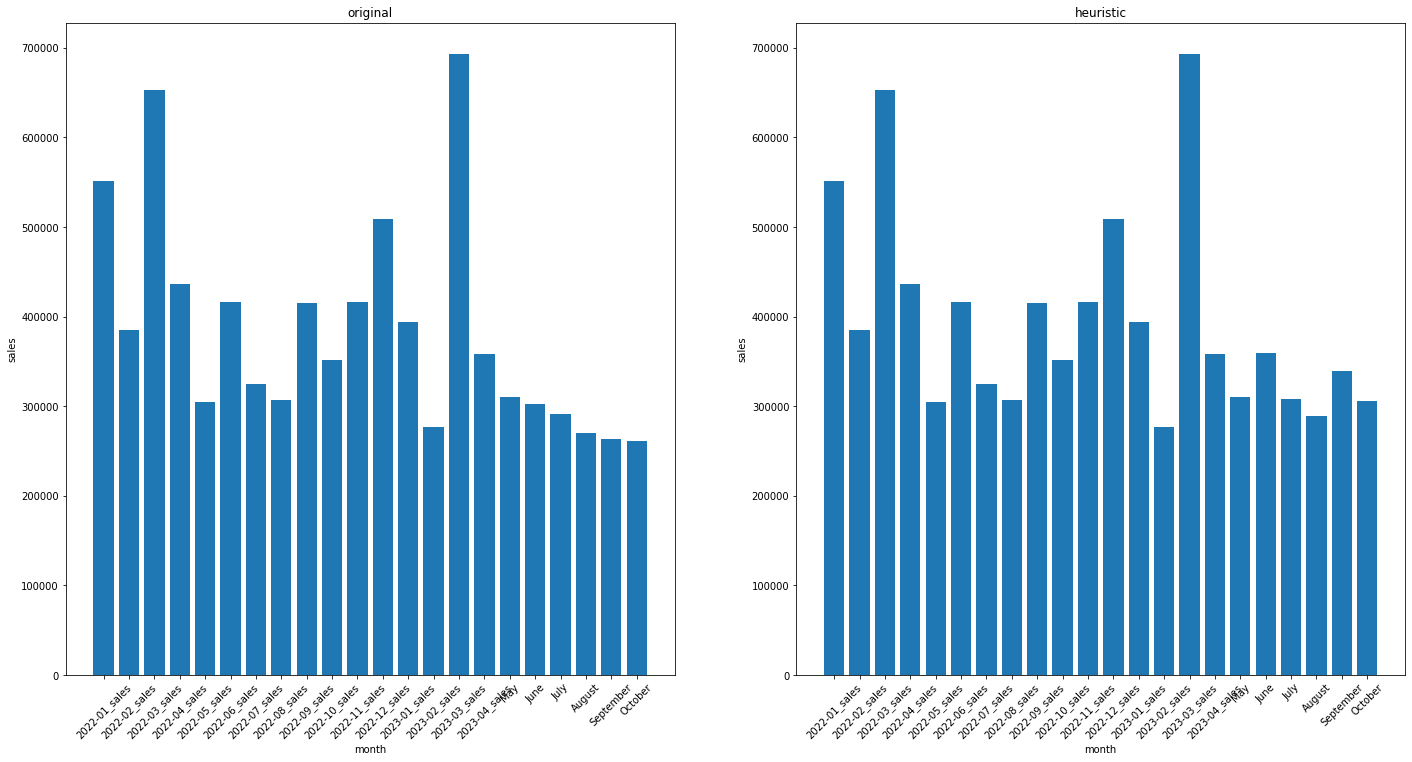

In [11]:
plot("avaasa_#_#_#_#_#")

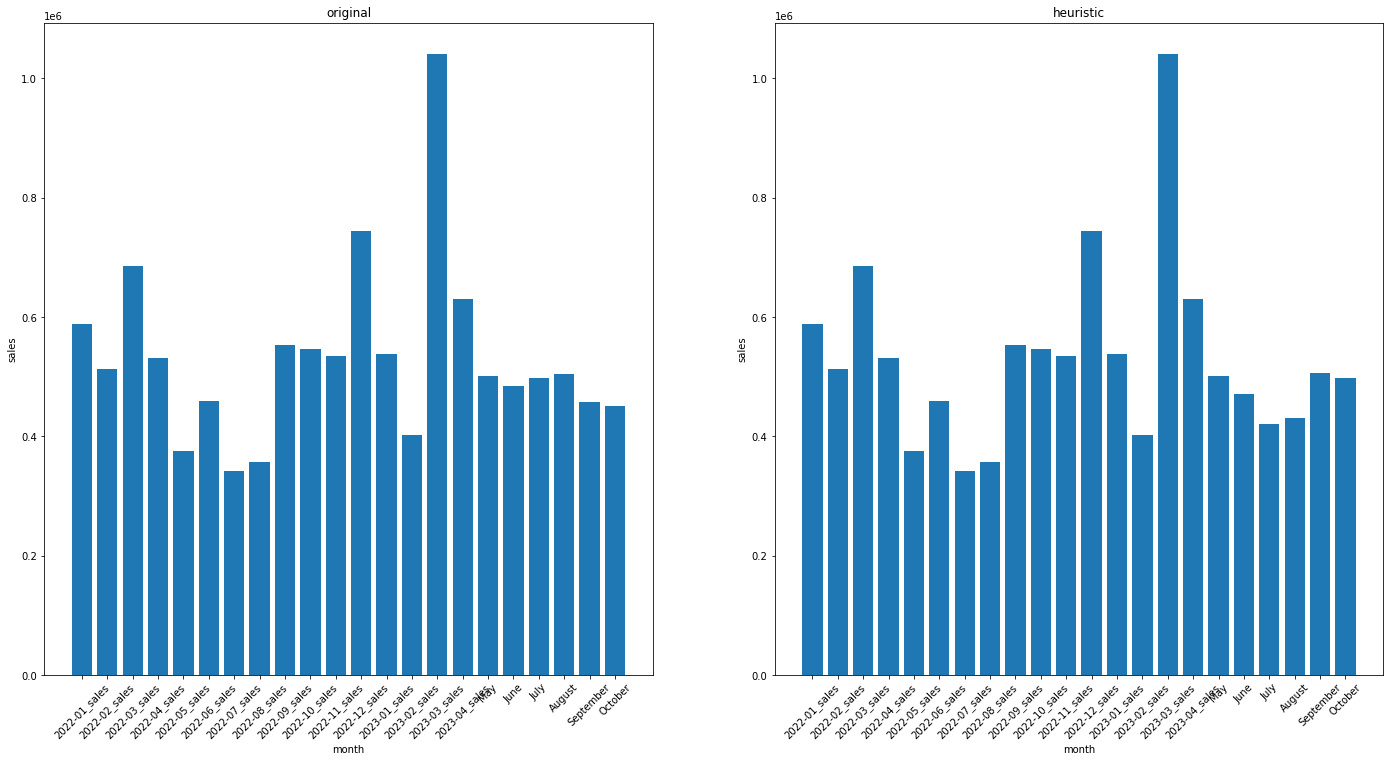

In [12]:
plot("#_#_#_#_#_straight")

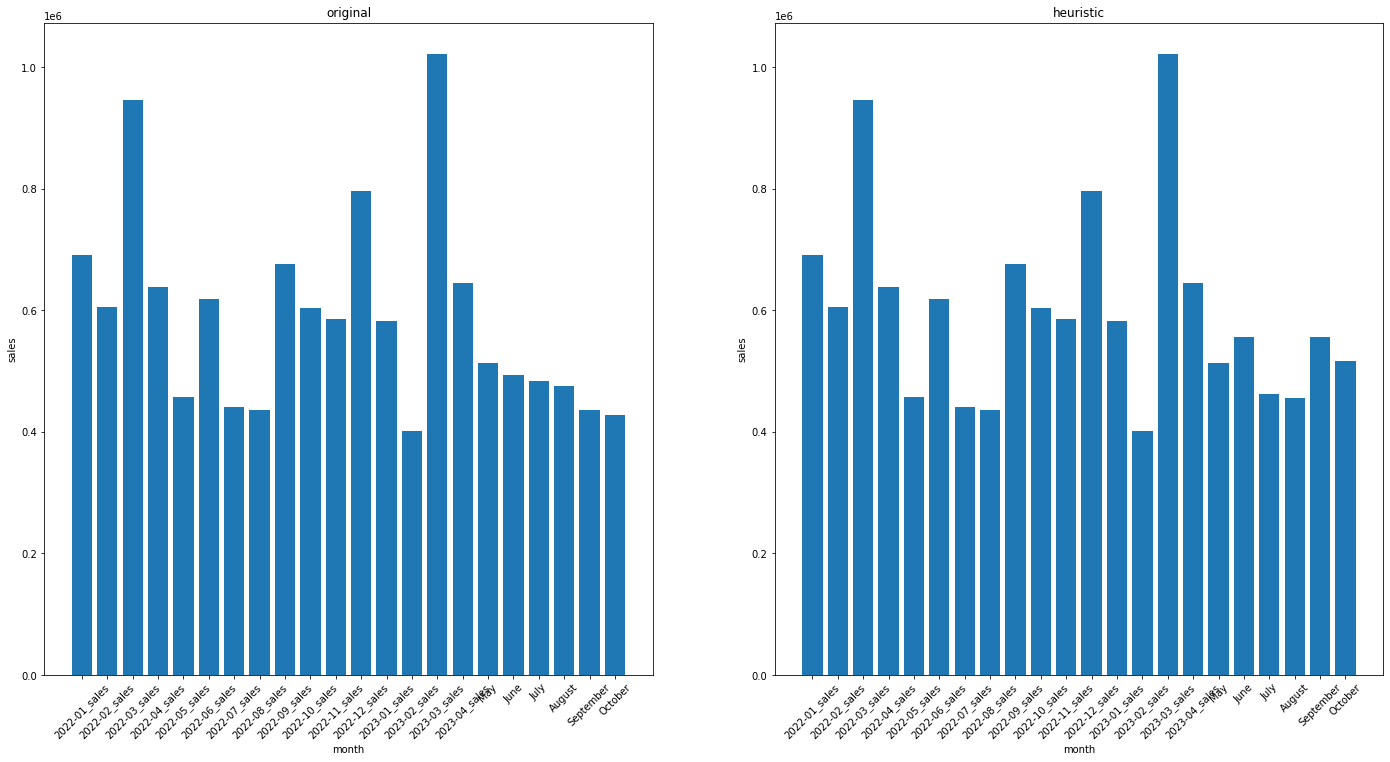

In [13]:
plot("#_#_#_1_#_#")

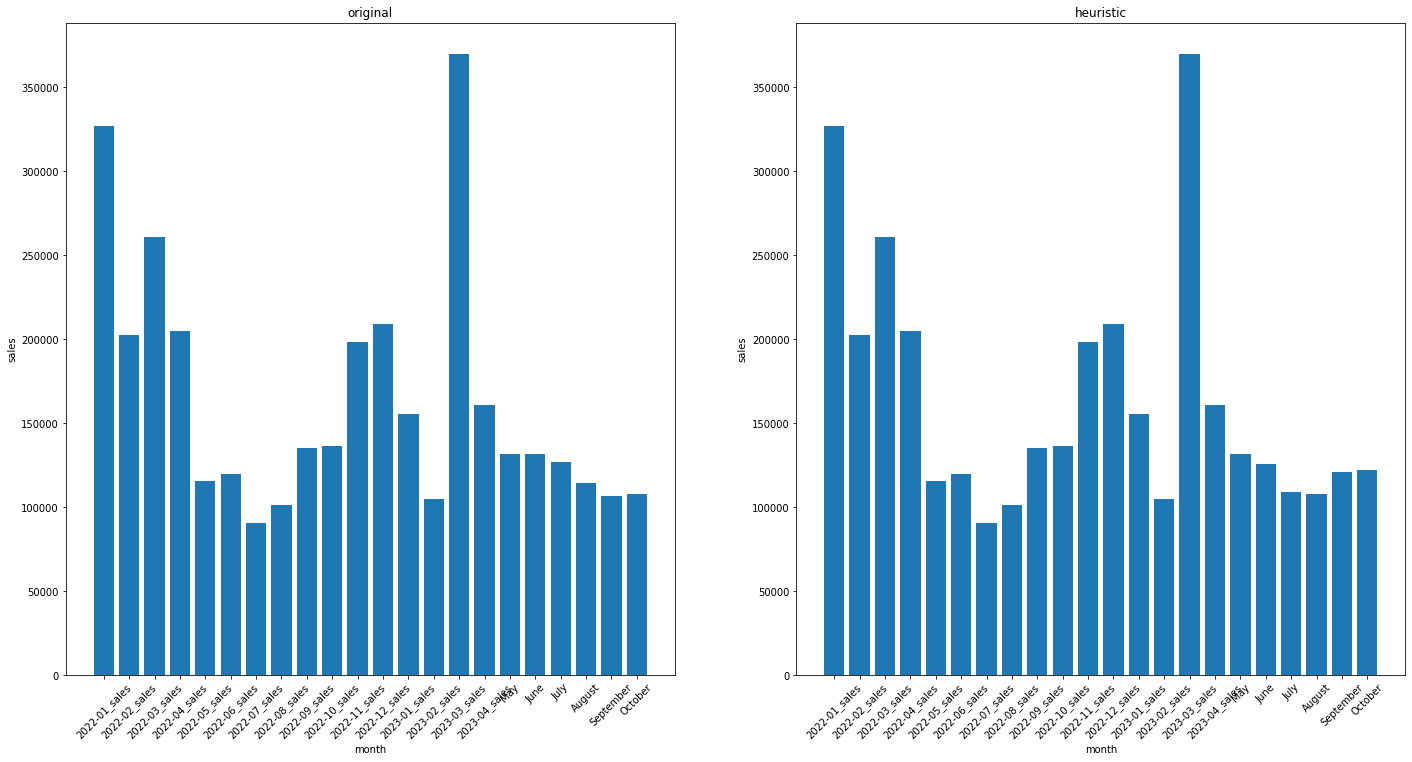

In [14]:
plot("avaasa_#_#_1_3-4th sleeve_straight")

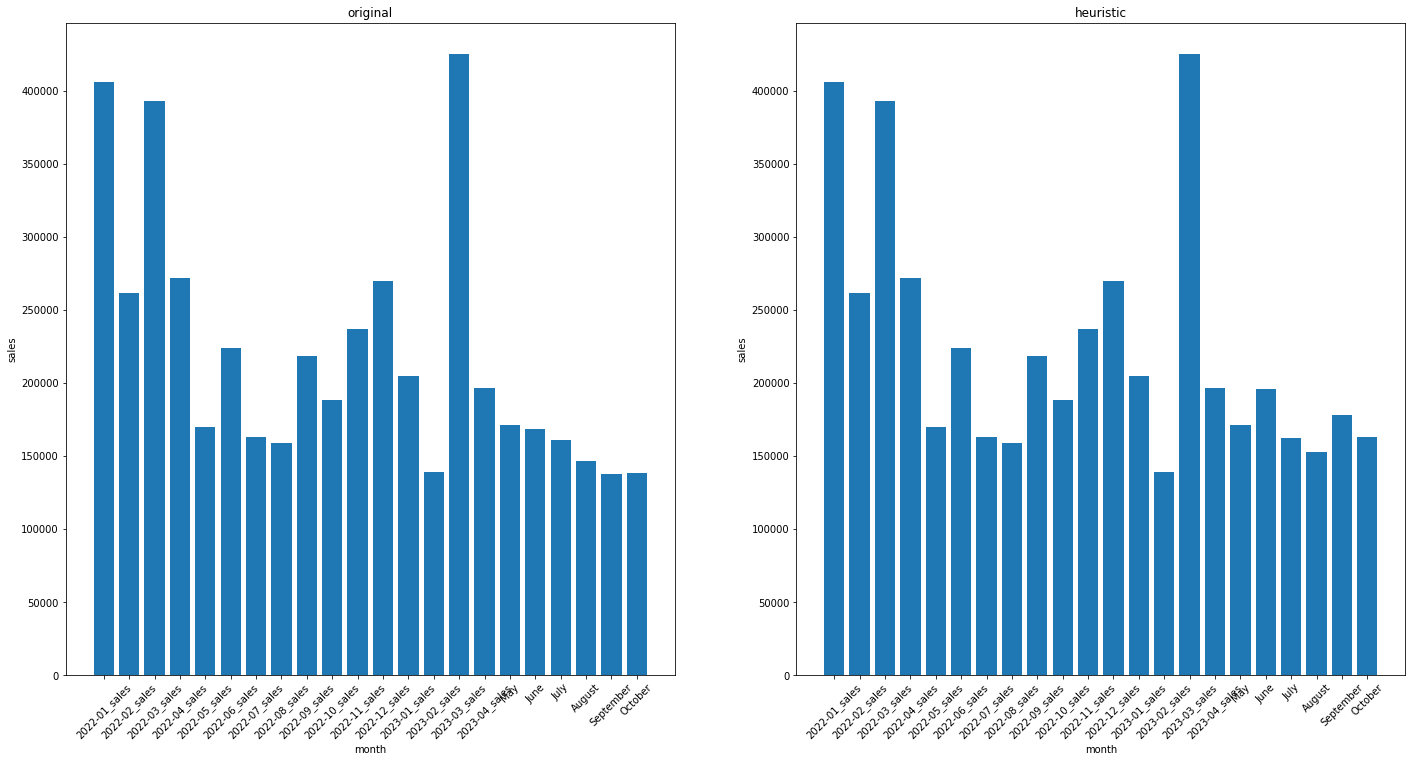

In [47]:
plot("avaasa_#_#_1_3-4th sleeve_#")

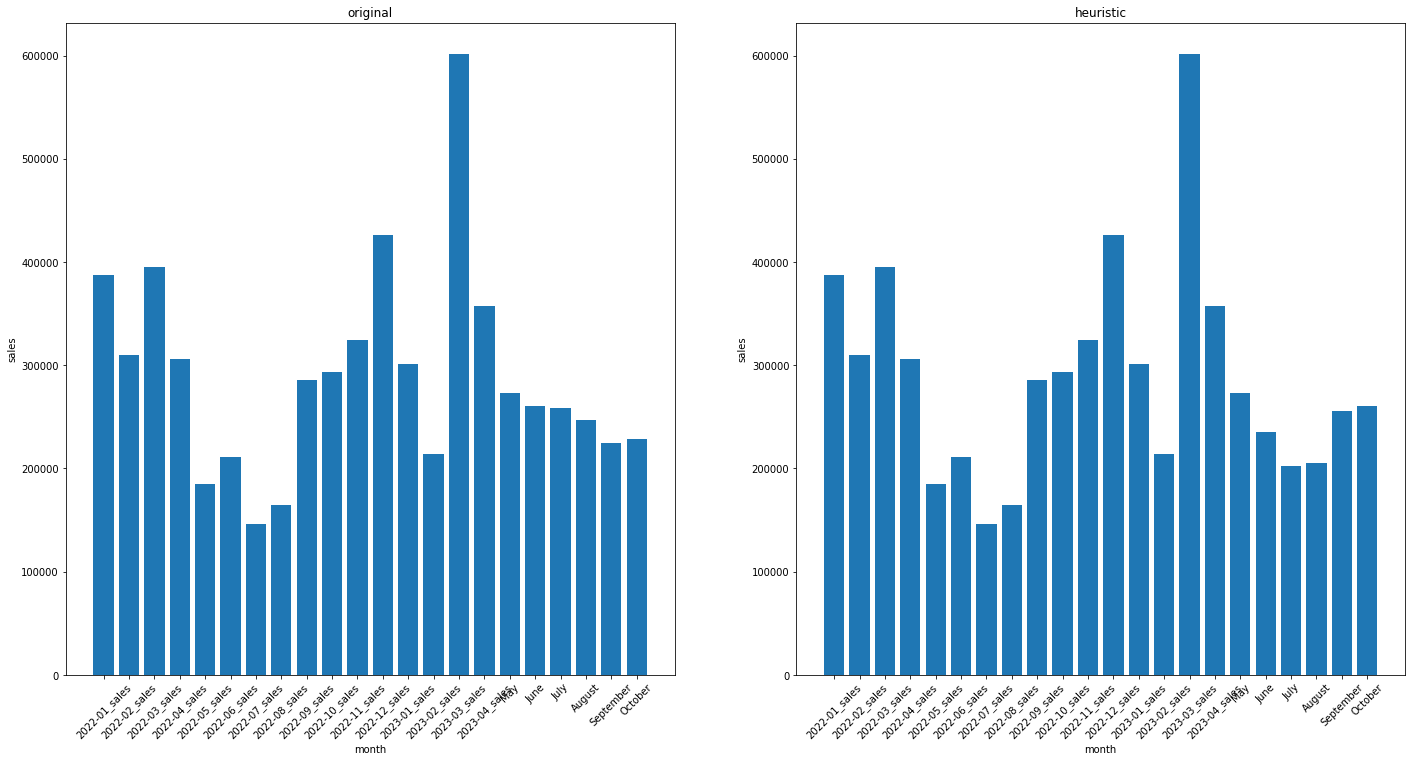

In [15]:
plot("#_#_#_1_3-4th sleeve_straight")